In [7]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


/var/folders/w7/stjx30757n5_hk7yzrbd5b8w0000gn/T/ipykernel_42347/958206930.py:23: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:281.)
  train_feat_X = torch.tensor(train_feat, dtype=torch.float32)


Epoch [5/20], Loss: 0.7008
Epoch [10/20], Loss: 0.7005
Epoch [15/20], Loss: 0.7002
Epoch [20/20], Loss: 0.6999
Validation Accuracy: 51.53%


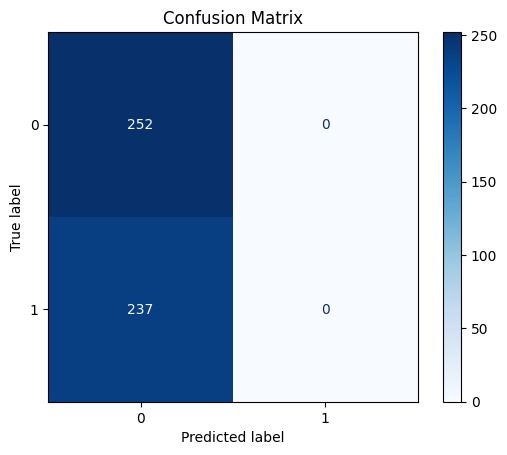

In [11]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Read feature dataset
train_feat = np.load("/Users/siya/Desktop/datasets/train/train_feature.npz", allow_pickle=True)
val_feat = np.load("/Users/siya/Desktop/datasets/valid/valid_feature.npz", allow_pickle=True)
train_feat_X = train_feat['features']
train_feat_Y = train_feat['label']
valid_feat_X = val_feat['features']
valid_feat_Y = val_feat['label']

# Flatten train and validation features using list comprehensions
train_feat = [i.flatten() for i in train_feat_X]
valid_feat = [i.flatten() for i in valid_feat_X]

# Convert to tensors
train_feat_X = torch.tensor(train_feat, dtype=torch.float32)
valid_feat_X = torch.tensor(valid_feat, dtype=torch.float32)
train_feat_Y = torch.tensor(train_feat_Y, dtype=torch.float32).unsqueeze(1)
valid_feat_Y = torch.tensor(valid_feat_Y, dtype=torch.float32).unsqueeze(1)

# Define the model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(9984, 4),
            nn.ReLU(),
            nn.Linear(4, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return torch.sigmoid(logits)

model = NeuralNetwork()

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train(model, X, Y, optimizer, criterion, epochs=20):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Validation function
def validate(model, X, Y):
    model.eval()
    with torch.no_grad():
        outputs = model(X)
        predicted = (outputs > 0.5).float()  # Convert probabilities to binary predictions
        accuracy = (predicted == Y).float().mean()
        print(f'Validation Accuracy: {accuracy.item() * 100:.2f}%')
        return predicted

# Train the model
train(model, train_feat_X, train_feat_Y, optimizer, criterion, epochs=20)

# Validate the model and get predictions
predicted_vals = validate(model, valid_feat_X, valid_feat_Y)

# Confusion Matrix
cm = confusion_matrix(valid_feat_Y.numpy(), predicted_vals.numpy())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [8]:
# read feature dataset
train_feat = np.load("/Users/siya/Desktop/datasets/train/train_feature.npz", allow_pickle=True)
val_feat = np.load("/Users/siya/Desktop/datasets/valid/valid_feature.npz", allow_pickle=True)
train_feat_X = train_feat['features']
train_feat_Y = train_feat['label']
valid_feat_X = val_feat['features']
valid_feat_Y = val_feat['label']
test_feat_X = np.load("/Users/siya/Desktop/datasets/test/test_feature.npz", allow_pickle=True)['features']


In [9]:
print(f"Train dataset size: ")
print(f"train_feat_X: {train_feat_X.shape} train_feat_Y: {train_feat_Y.shape}")


print()
print("Test dataset size: ")
print(f"test_feat_X: {test_feat_X.shape}")


Train dataset size: 
train_feat_X: (7080, 13, 768) train_feat_Y: (7080,)

Test dataset size: 
test_feat_X: (2232, 13, 768)


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Convolutional layer: input channels=1, output channels=16, kernel size=3
        self.conv1 = nn.Conv1d(in_channels=13, out_channels=16, kernel_size=3)
        # ReLU activation
        self.relu = nn.ReLU()
        # Flatten the output of the convolution
        self.flatten = nn.Flatten()
        # Fully connected layer: reducing the size to 32
        self.fc1 = nn.Linear(16 * 784, 16)  # Adjust 784 based on the output size of the conv layer
        # Output layer: binary classification
        self.fc2 = nn.Linear(16, 1)
        # Sigmoid for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Apply convolution and ReLU
        x = self.conv1(x)
        x = self.relu(x)
        # Flatten the output
        x = self.flatten(x)
        # Apply the first fully connected layer
        x = self.fc1(x)
        x = self.relu(x)
        # # Apply the output layer with sigmoid
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model
model = SimpleCNN()

# Print the number of trainable parameters
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {trainable_params}")

# Ensure the number of parameters is below 10,000
# assert trainable_params <= 10000, "Model has more than 10,000 trainable parameters!"

# Example training loop (without actual training data)
# Replace train_feat_X, train_feat_Y, valid_feat_X, valid_feat_Y with your actual data
# Assuming train_feat_X and valid_feat_X have shape (N, 13, 786)

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training (dummy loop - adjust for actual data)
for epoch in range(5):  # Run for 5 epochs (adjust as needed)
    model.train()
    # Example dummy batch data (replace with your actual training data)
    inputs = torch.tensor(train_feat_X).float()  # Convert your NumPy array to a tensor
    labels = torch.tensor(train_feat_Y).float().view(-1, 1)  # Ensure labels have shape (N, 1)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch [{epoch + 1}/5], Loss: {loss.item()}")

# Evaluation
model.eval()
with torch.no_grad():
    valid_inputs = torch.tensor(valid_feat_X).float()
    valid_labels = torch.tensor(valid_feat_Y).float()
    outputs = model(valid_inputs)
    predictions = (outputs >= 0.5).int().view(-1).numpy()
    valid_labels = valid_labels.int().numpy()

    # Compute and display the confusion matrix
    cm = confusion_matrix(valid_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()


Total trainable parameters: 201377


RuntimeError: mat1 and mat2 shapes cannot be multiplied (7080x12256 and 12544x16)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Convolutional layer: input channels=1, output channels=16, kernel size=3
        self.conv1 = nn.Conv1d(in_channels=13, out_channels=16, kernel_size=3)
        # ReLU activation
        self.relu = nn.ReLU()
        # Flatten the output of the convolution
        self.flatten = nn.Flatten()
        # Fully connected layer: reducing the size to 32
        self.fc1 = nn.Linear(16 * 784, 16)  # Adjust 784 based on the output size of the conv layer
        # Output layer: binary classification
        self.fc2 = nn.Linear(16, 1)
        # Sigmoid for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Apply convolution and ReLU
        x = self.conv1(x)
        x = self.relu(x)
        # Flatten the output
        x = self.flatten(x)
        # Apply the first fully connected layer
        x = self.fc1(x)
        x = self.relu(x)
        # # Apply the output layer with sigmoid
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model
model = SimpleCNN()

# Print the number of trainable parameters
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {trainable_params}")

# Ensure the number of parameters is below 10,000
# assert trainable_params <= 10000, "Model has more than 10,000 trainable parameters!"

# Example training loop (without actual training data)
# Replace train_feat_X, train_feat_Y, valid_feat_X, valid_feat_Y with your actual data
# Assuming train_feat_X and valid_feat_X have shape (N, 13, 786)

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training (dummy loop - adjust for actual data)
for epoch in range(5):  # Run for 5 epochs (adjust as needed)
    model.train()
    # Example dummy batch data (replace with your actual training data)
    inputs = torch.tensor(train_feat_X).float()  # Convert your NumPy array to a tensor
    labels = torch.tensor(train_feat_Y).float().view(-1, 1)  # Ensure labels have shape (N, 1)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch [{epoch + 1}/5], Loss: {loss.item()}")

# Evaluation
model.eval()
with torch.no_grad():
    valid_inputs = torch.tensor(valid_feat_X).float()
    valid_labels = torch.tensor(valid_feat_Y).float()
    outputs = model(valid_inputs)
    predictions = (outputs >= 0.5).int().view(-1).numpy()
    valid_labels = valid_labels.int().numpy()

    # Compute and display the confusion matrix
    cm = confusion_matrix(valid_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()


Total trainable parameters: 13185


/Users/siya/miniconda3/envs/work_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


: 

In [ ]:
# Flatten train and validation features using list comprehensions
train_feat = [i.flatten() for i in train_feat_X]
valid_feat = [i.flatten() for i in valid_feat_X]

# Convert labels to float tensors in one step
train_feat_Y = torch.tensor(train_feat_Y, dtype=torch.float32).unsqueeze(1)
valid_feat_Y = torch.tensor(valid_feat_Y, dtype=torch.float32).unsqueeze(1)


In [ ]:
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(9984, 4),
            nn.ReLU(),
            nn.Linear(4, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return torch.sigmoid(logits)

In [ ]:
model = NeuralNetwork()

In [ ]:
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.BCELoss()

#torch.autograd.set_detect_anomaly(True)

def train(model, optimiser, mode):
    if mode == 'train':
        model.train()

        loss = 0
        for idx, train_data in enumerate(train_feat):
            train_data = torch.tensor(train_data)
            optimiser.zero_grad()
            data = model(x=train_data)
            print(data)
            print(train_feat_Y[idx])
            batch_loss = criterion(data, train_feat_Y[idx])
            loss += batch_loss.item()

            batch_loss.backward() #should be batch_loss not overall loss- inplace error, interferes with backpropagation
            optimiser.step()
        return data
    else:
        model.eval()

        val_loss = 0
        for idx, val_data in enumerate(valid_feat_X):
            val_data = torch.tensor(val_data)
            optimiser.zero_grad()
            # val_data.to(device)
            data = model(x=val_data)
            batch_val_loss = criterion(data, valid_feat_Y[idx])
            val_loss += batch_val_loss.item()
        return data

/Users/siya/miniconda3/envs/work_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
train_pred = []
val_pred = []

for epoch in range(50):
    train_pred.append(train(model, optimiser, 'train'))
    val_pred.append(train(model, optimiser, 'valid'))



: 

In [ ]:
y_pred_train = (train_pred >= 0.5).astype(int)
y_pred_val = (val_pred >= 0.5).astype(int)

In [ ]:
cm = confusion_matrix(y_true, y_pred_train)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: training dataset")
plt.show()

In [ ]:
cm = confusion_matrix(y_true, y_pred_val)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: validation dataset")
plt.show()

#Common code for Evaluation 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues, title='Confusion matrix'):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=cmap)
    plt.title(title)
    plt.show()

def get_classification_report(y_true, y_pred):
    return classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'])

def evaluate_predictions(y_true, y_pred, title) :
    
    report = get_classification_report(y_true, y_pred)
    print(report)
    
    plot_confusion_matrix(y_true, y_pred, classes = ['Class 0', 'Class 1'], title=title)
    
    print(f'Accuracy is {accuracy_score(y_true,y_pred)}')